In [1]:
from fastai import *
from fastai.tabular import *

In [2]:
path = Path('data/Kaggle/House_Prices')

In [4]:
path.ls()

[PosixPath('data/Kaggle/House_Prices/Kaggle_House_Prices_test.csv'),
 PosixPath('data/Kaggle/House_Prices/Kaggle_House_Prices_train.csv')]

In [5]:
df_train = pd.read_csv(path/'Kaggle_House_Prices_train.csv')
df_test = pd.read_csv(path/'Kaggle_House_Prices_test.csv')

In [6]:
# Fill empty test values with the mean
df_test.fillna(value = df_test.mean(), inplace=True)

In [7]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
cat_names = df_train.select_dtypes(include=['object']).columns.tolist()
len(cat_names)

43

In [16]:
cont_names = df_train.select_dtypes(include=[np.number]).columns.tolist()
cont_names.remove('SalePrice')
cont_names.remove('Id')
len(cont_names)

36

In [18]:
dep_var = 'SalePrice'

In [19]:
procs = [FillMissing, Categorify, Normalize]

In [20]:
test = TabularList.from_df(df_test, cat_names=cat_names, cont_names=cont_names, procs=procs)

In [22]:
data = (TabularList.from_df(df_train, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                        .split_by_rand_pct(valid_pct = 0.2, seed = 42)
                        .label_from_df(cols = dep_var, label_cls = FloatList, log = True)
                        .add_test(test)
                        .databunch())

In [23]:
learn = tabular_learner(data, layers=[200,100], metrics=rmse)

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


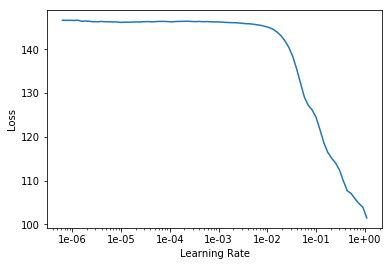

In [25]:
learn.recorder.plot()

In [26]:
learn.save('Pre-Learn')

In [27]:
learn.fit_one_cycle(15, max_lr =5e-01)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,88.298584,136.111725,11.662444,00:00
1,48.166084,0.529552,0.727581,00:00
2,27.868645,0.740361,0.859646,00:00
3,17.051975,0.365189,0.603547,00:00
4,10.898274,0.192104,0.433861,00:00
5,7.200176,0.047809,0.218250,00:01
6,4.868829,0.083772,0.287225,00:00
7,3.350307,0.226483,0.472268,00:00
8,2.335668,0.063970,0.251200,00:00
9,1.620963,0.064349,0.253419,00:00


In [ ]:
learn.load('Pre-Learn')

In [29]:
learn.fit_one_cycle(15, max_lr =1e-01)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,136.026871,116.274628,10.783026,00:00
1,79.585892,30.366970,5.501208,00:00
2,46.100712,1.328423,1.147230,00:00
3,28.139263,0.076676,0.274635,00:01
4,17.966873,0.181503,0.424679,00:01
5,11.813319,0.063841,0.252060,00:00
6,7.925714,0.058431,0.240751,00:00
7,5.391196,0.044159,0.208099,00:00
8,3.701570,0.059332,0.242756,00:00
9,2.554127,0.019834,0.139530,00:00


In [30]:
learn.save('200,100 - 15 - 1e-1')

In [31]:
learn.fit_one_cycle(5, max_lr =1e-01)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.020448,0.022273,0.148664,00:00
1,0.289583,0.322302,0.564619,00:00
2,0.208645,0.104481,0.322827,00:00
3,0.142125,0.024144,0.153586,00:00
4,0.099127,0.022086,0.146515,00:00


In [32]:
learn.fit_one_cycle(15, max_lr =1e-01)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.018306,0.030710,0.174292,00:00
1,0.022321,0.028215,0.167236,00:00
2,0.026324,0.023882,0.154084,00:01
3,0.074928,0.197640,0.444281,00:01
4,0.117079,0.086516,0.291871,00:00
5,0.101675,0.042245,0.204153,00:00
6,0.099529,0.101409,0.318402,00:00
7,0.077142,0.027361,0.164193,00:00
8,0.075270,0.035263,0.187656,00:00
9,0.070758,0.052237,0.227067,00:00


In [33]:
learn.save('200,100 - 15,5,15 - 1e-1')

In [35]:
test_id = df_test['Id']
preds, targets = learn.get_preds(DatasetType.Test)
labels = [np.exp(p[0].data.item()) for p in preds]

submission = pd.DataFrame({'Id': test_id, 'SalePrice': labels})
submission.to_csv('Kaggle_House_Price-1.csv', index=False)
submission.head()

,Id,SalePrice
0,1461,117435.446001
1,1462,151132.452983
2,1463,177848.598432
3,1464,189340.153482
4,1465,186453.243844
